In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima

In [2]:
df = pd.read_csv('./data/GlobalTemperatures.csv')

In [3]:
df.drop(columns = {'LandAverageTemperatureUncertainty', 'LandMaxTemperatureUncertainty', 
                   'LandMinTemperatureUncertainty', 'LandAndOceanAverageTemperatureUncertainty'}, inplace= True)
df.head()

,dt,LandAverageTemperature,LandMaxTemperature,LandMinTemperature,LandAndOceanAverageTemperature
0,1750-01-01,3.034,NaN,NaN,NaN
1,1750-02-01,3.083,NaN,NaN,NaN
2,1750-03-01,5.626,NaN,NaN,NaN
3,1750-04-01,8.490,NaN,NaN,NaN
4,1750-05-01,11.573,NaN,NaN,NaN


In [4]:
df = df.dropna()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1992 entries, 1200 to 3191
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   dt                              1992 non-null   object 
 1   LandAverageTemperature          1992 non-null   float64
 2   LandMaxTemperature              1992 non-null   float64
 3   LandMinTemperature              1992 non-null   float64
 4   LandAndOceanAverageTemperature  1992 non-null   float64
dtypes: float64(4), object(1)
memory usage: 93.4+ KB


In [6]:
df['dt'] = pd.to_datetime(df['dt'], format = "%Y-%m-%d")

In [7]:
df = df.set_index('dt')

Some steps and analysis were already made with this dataframe in 'Sarimax_model'. Check this notebook to see seasonal and stationarity analysis and more.

In [11]:
#y = df['LandAverageTemperature'].copy()
#X = df.copy()

## XGBoost Model

In [8]:
from xgboost import XGBRegressor

In [21]:
train = df.loc[df.index < '1970-01-01']
validation = df.loc[df.index >= '1970-01-01']

train.shape, validation.shape

((1440, 4), (552, 4))

In [22]:
train['LandAverageTemperature']

dt
1850-01-01     0.749
1850-02-01     3.071
1850-03-01     4.954
1850-04-01     7.217
1850-05-01    10.004
               ...  
1969-08-01    13.804
1969-09-01    12.048
1969-10-01     9.489
1969-11-01     6.420
1969-12-01     4.210
Name: LandAverageTemperature, Length: 1440, dtype: float64

Ahead value: target

In [23]:
train['target_pred'] = train['LandAverageTemperature'].shift(-1)
train.head()

C:\Users\Matheus\AppData\Local\Temp\ipykernel_300\1212321535.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['target_pred'] = train['LandAverageTemperature'].shift(-1)


,LandAverageTemperature,LandMaxTemperature,LandMinTemperature,LandAndOceanAverageTemperature,target_pred
dt,,,,,
1850-01-01,0.749,8.242,-3.206,12.833,3.071
1850-02-01,3.071,9.970,-2.291,13.588,4.954
1850-03-01,4.954,10.347,-1.905,14.043,7.217
1850-04-01,7.217,12.934,1.018,14.667,10.004
1850-05-01,10.004,15.655,3.811,15.507,13.150


In [24]:
train.dropna(inplace=True) # drop last value NaN because of naive prediction

C:\Users\Matheus\AppData\Local\Temp\ipykernel_300\1985275749.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.dropna(inplace=True) # drop last value NaN because of naive prediction


In [25]:
validation['target_pred'] = validation['LandAverageTemperature'].shift(-1)
validation.head()

C:\Users\Matheus\AppData\Local\Temp\ipykernel_300\1176286764.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['target_pred'] = validation['LandAverageTemperature'].shift(-1)


,LandAverageTemperature,LandMaxTemperature,LandMinTemperature,LandAndOceanAverageTemperature,target_pred
dt,,,,,
1970-01-01,2.836,8.288,-2.584,13.711,3.735
1970-02-01,3.735,9.543,-2.020,14.022,5.272
1970-03-01,5.272,11.066,-0.545,14.503,8.603
1970-04-01,8.603,14.383,2.739,15.440,11.206
1970-05-01,11.206,17.165,5.402,16.104,13.513


In [26]:
validation.tail()

,LandAverageTemperature,LandMaxTemperature,LandMinTemperature,LandAndOceanAverageTemperature,target_pred
dt,,,,,
2015-08-01,14.755,20.699,9.005,17.589,12.999
2015-09-01,12.999,18.845,7.199,17.049,10.801
2015-10-01,10.801,16.450,5.232,16.290,7.433
2015-11-01,7.433,12.892,2.157,15.252,5.518
2015-12-01,5.518,10.725,0.287,14.774,NaN


In [27]:
validation.dropna(inplace=True)

C:\Users\Matheus\AppData\Local\Temp\ipykernel_300\2326254463.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation.dropna(inplace=True)


In [34]:
X_features = ['LandAverageTemperature', 
              'LandMaxTemperature', 
              'LandMinTemperature', 
              'LandAndOceanAverageTemperature']

X_train = train.loc[:, X_features].values
y_train = train.loc[:, ['target_pred']].values
X_validation = validation.loc[:, X_features].values
y_validation = validation.loc[:, ['target_pred']].values

In [35]:
model_xgb = XGBRegressor(objective="reg:squarederror", n_estimators=1000)
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [36]:
prediction = model_xgb.predict(X_validation)
prediction

array([ 3.9963505,  5.794772 ,  8.466163 , 11.792947 , 12.971813 ,
       13.244601 , 13.844705 , 12.681466 ,  9.500156 ,  6.2842693,
        3.5588043,  3.261578 ,  3.3836079,  4.4316607,  8.472129 ,
       10.741943 , 11.5770855, 13.954187 , 13.575279 , 11.979118 ,
        9.399976 ,  6.2863665,  3.6763783,  1.9698504,  2.7236311,
        4.52331  ,  8.1954775, 11.340413 , 12.353583 , 13.076274 ,
       13.827073 , 13.600425 ,  9.3256235,  6.302696 ,  4.2935224,
        3.1820629,  4.3047748,  5.9343348,  9.429786 , 11.244934 ,
        9.8074   , 12.041175 , 13.700145 , 12.500185 ,  9.166719 ,
        6.3643684,  3.83861  ,  2.4220884,  2.6579835,  2.9564233,
        3.6158116, 10.477004 , 10.861801 , 14.027523 , 13.293516 ,
       13.571485 ,  9.600779 ,  5.5014014,  3.5760446,  2.287196 ,
        3.751237 ,  4.9016185,  6.599598 , 10.12697  ,  9.38196  ,
       14.674395 , 13.821236 , 12.21461  ,  9.617553 ,  6.3468437,
        3.8090327,  1.7384888,  1.7574246,  3.3665128,  8.276 

In [37]:
validation["prediction"] = prediction
validation.head()

C:\Users\Matheus\AppData\Local\Temp\ipykernel_300\4274395957.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation["prediction"] = prediction


,LandAverageTemperature,LandMaxTemperature,LandMinTemperature,LandAndOceanAverageTemperature,target_pred,prediction
dt,,,,,,
1970-01-01,2.836,8.288,-2.584,13.711,3.735,3.996351
1970-02-01,3.735,9.543,-2.020,14.022,5.272,5.794772
1970-03-01,5.272,11.066,-0.545,14.503,8.603,8.466163
1970-04-01,8.603,14.383,2.739,15.440,11.206,11.792947
1970-05-01,11.206,17.165,5.402,16.104,13.513,12.971813


In [39]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_validation, prediction)
print(f"MAE XG Boost model: {mae}")

MAE XG Boost model: 1.6484710094777295


In [42]:
plt.rcParams['figure.figsize'] = [14, 6]

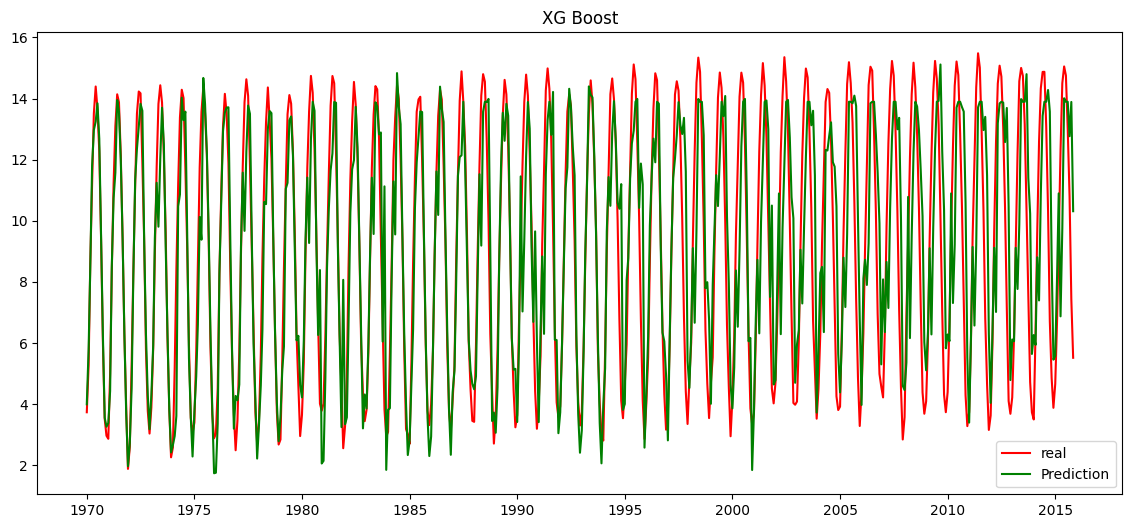

In [43]:
plt.plot(validation.index,validation['target_pred'],color='red',label='real')
plt.plot(validation.index,validation['prediction'], color='green', label='Prediction')
plt.legend()
plt.title('XG Boost')
plt.show()